## Visualizing the Perceptron algorithm

CS189

In [547]:
#imports
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from IPython import display
import time

In [580]:
X,y = load_iris(return_X_y=True)

In [586]:
df = pd.concat([pd.DataFrame(X[:70,2:4]),pd.DataFrame(y[:70])], axis = 1)

In [587]:
df.columns = ["feature_one", "feature_two", "label"]

In [588]:
df.tail()

,feature_one,feature_two,label
65,4.4,1.4,1
66,4.5,1.5,1
67,4.1,1.0,1
68,4.5,1.5,1
69,3.9,1.1,1


In [589]:
df["label"] = df["label"].replace({2: 1, 0: -1})
df["feature_one"] -= 3
df["feature_two"] -= 0.8

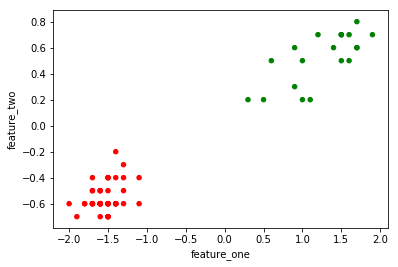

In [590]:
colors = df["label"].map({-1:"r", 1:"g"})
df.plot.scatter(x="feature_one", y="feature_two", c=colors)

## Feature Space!

In [760]:
#initialize random w
w = [1.0,-11]
w = np.array(w)
w

array([  1., -11.])

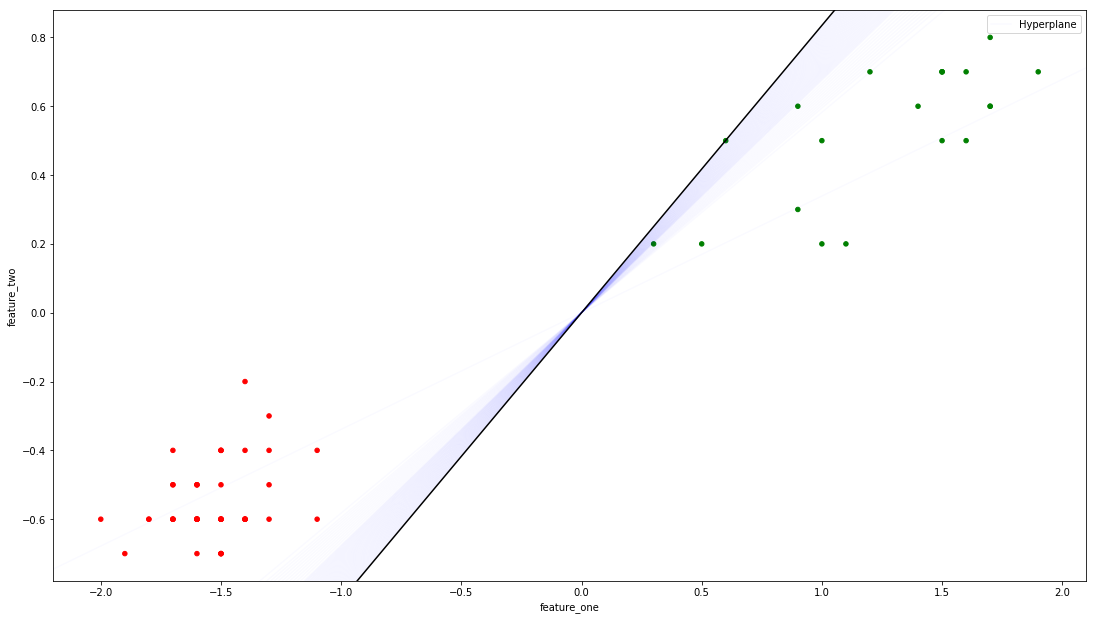

In [761]:
eps = .02
misclassified = []
start = True
num_iter= 0
colors = df["label"].map({-1:"r", 1:"g"})
ax = df.plot.scatter(x="feature_one", y="feature_two", c=colors, figsize=(18.5, 10.5))

ax.set_autoscale_on(False)
while len(misclassified) > 0 or start:
    misclassified = [row for row in df.itertuples() if row.label * (w[0] * row.feature_one + w[1] * row.feature_two )< 0]
    sum_feature_one = eps*sum([row.feature_one * row.label for row in misclassified])
    sum_feature_two = eps*sum([row.feature_two * row.label for row in misclassified])
    w += (np.array([sum_feature_one, sum_feature_two]))
    num_iter += 1
        # w[0] * x + w[1] * y = 0 
    a = -w[0] / w[1]
    x = np.linspace(-3,3)
    y = a * x
    line, = plt.plot(x,y, c="b", label="Hyperplane" if start else "")
    plt.legend()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if len(misclassified) > 0:
        line.set_alpha(0.02)
    else:
        line.set_color("black")
    start = False


## Weight space!

In [766]:
#initialize random w
w = [1.0,-11]
w = np.array(w)
w

array([  1., -11.])

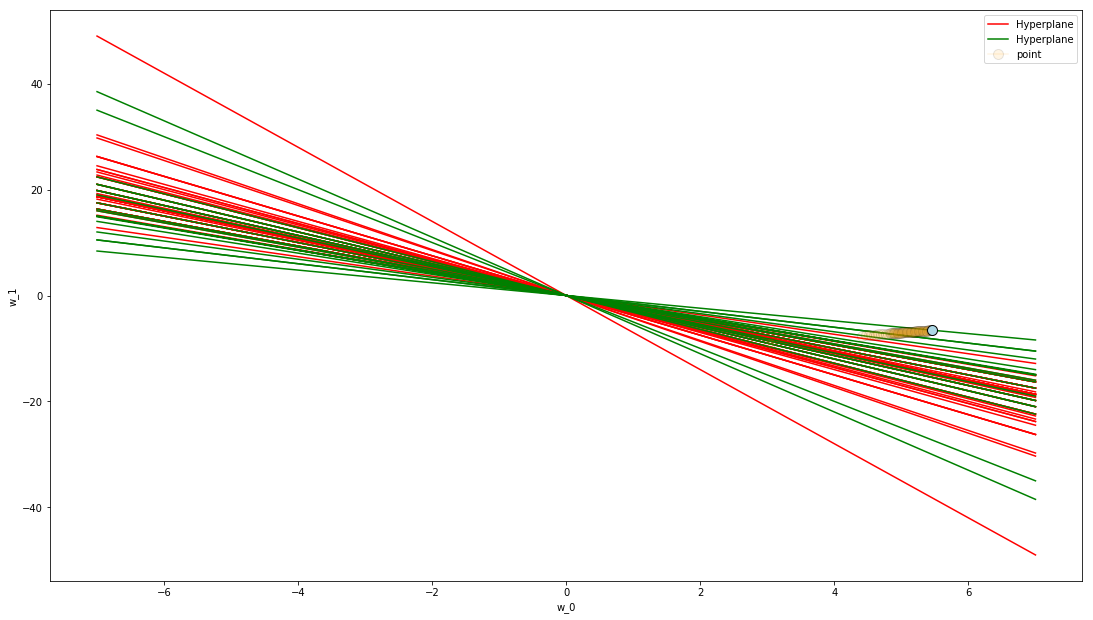

In [767]:
eps = .02
misclassified = []
start = True
num_iter= 0
mapping = {-1:"r", 1:"g"}
seen = {-1: True, 1: True}
colors = df["label"].map(mapping)
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
axes = fig.add_subplot(111)
for row in df.itertuples():
    a = -row.feature_one / (row.feature_two + 1e-10)
    x = np.linspace(-7,7)
    y = a * x
    axes.plot(x, y, c=mapping[row.label], label="Hyperplane" if seen[row.label] else "")
    seen[row.label] = False
axes.legend()
plt.xlabel("w_0")
plt.ylabel("w_1")
axes.set_autoscale_on(False)
while len(misclassified) > 0 or start:
    misclassified = [row for row in df.itertuples() if row.label * (w[0] * row.feature_one + w[1] * row.feature_two )< 0]
    sum_feature_one = eps*sum([row.feature_one * row.label for row in misclassified])
    sum_feature_two = eps*sum([row.feature_two * row.label for row in misclassified])
    w += (np.array([sum_feature_one, sum_feature_two]))
    num_iter += 1
    line, = axes.plot(w[0],w[1], marker='o', color = "orange", markersize=10, markeredgecolor='black',
         markeredgewidth=1.0, label="point" if start else "")
    axes.legend()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    if len(misclassified) > 0:
        line.set_alpha(0.1)
    else:
        line.set_color("lightblue")
    start = False
